In [68]:
import pandas as pd
import numpy as np
from sklearn import datasets, svm, neighbors
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


[5.743600e+04 1.461860e+05 5.460100e+04 3.819000e+03 2.209400e+04
 1.542200e+04 3.440000e+03 4.155000e+04 2.634347e+01 2.304280e+00
 9.503958e+01 1.030000e-03 5.383590e+00 4.321910e+00]
3.0
0.14492753623188406
0.30434782608695654
0.057971014492753624


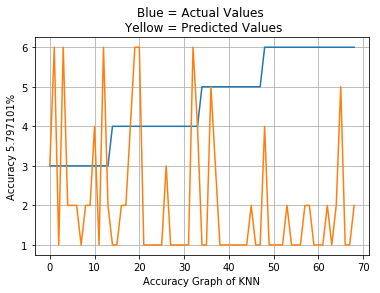

In [102]:
#cols = list(pd.read_csv("Mindwave.csv", nrows =1))
#print(cols)
data  = pd.read_csv("Mindwave.csv")

#data.to_csv("Mindwave.csv", index = False)
dataset = data.values

X = dataset[:,:14]
y = dataset[:,14]


X_train = X[:110]
y_train = y[:110]

X_test = X[110:]
y_test = y[110:]

print X_test[0]
print y_test[0]


svm_clf = svm.SVC()
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,5), random_state=5)


ANN_score = ann.fit(X_train,y_train).score(X_test, y_test)
SVM_score = svm_clf.fit(X_train, y_train).score(X_test, y_test)
KNN_score = knn.fit(X_train, y_train).score(X_test, y_test)

y_pred = knn.predict(X_test)

print ANN_score
print SVM_score
print KNN_score

plot("KNN", y_test, y_pred, KNN_score)

In [98]:
def plot(label, true, pred, accu):
    t = np.arange(0, 69)
    true = np.array(true)
    pred = np.array(pred)

    fig, ax = plt.subplots()
    ax.plot(t, true, t, pred)

    ax.set(xlabel='Accuracy Graph of ' + label, ylabel='Accuracy %f' % (accu*100) + "%",
       title='Blue = Actual Values \n Yellow = Predicted Values')
    ax.grid()

    fig.savefig(label+".png", dpi = 1000)
    plt.show()

In [ ]:
def remove():
    